In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


In [ ]:
# preparation for spark
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
# Create SparkSession from builder
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('ALY6110_ASS2_Yude') \
                    .getOrCreate()

In [ ]:
# run spark
spark

In this lab we will practice our big data skills under PySpark environment using the BostonHousing data set. We will explore the data set following the instruction step by step.

**1. Read the given CSV file**

In [ ]:
# mount drive to colab
from google.colab import drive
drive.mount('/content/drive')

# read data set from drive
df = spark.read.csv('/content/drive/MyDrive/BostonHousing.csv',inferSchema=True, header=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Show the first 5 elements of your dataset**

In [7]:
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



**3. Count number of observation in the given**

In [9]:
print("Number of Observations):", df.count())

Number of Observations): 506


**4. Show the Schema of your dataset**

In [10]:
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



**5. Drop the column "b" from your dataset**

In [13]:
df = df.drop("b")
df.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2|29.93|16.5|
|0.17004|12.5| 7.87|   0|0.524|6.004| 85.9|6.5921|  5|311|   15.

**6. Round all of the numerical columns into two decimal place**

In [15]:
from pyspark.sql.functions import round

# pick numerical columns
numerical_columns = [col_name for col_name, dtype in df.dtypes if dtype == 'double']

# Round the numerical columns to two decimal places
for col in numerical_columns:
    df = df.withColumn(col, round(df[col], 2))

df.show()

+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+
|crim|  zn|indus|chas| nox|  rm|  age| dis|rad|tax|ptratio|lstat|medv|
+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58| 65.2|4.09|  1|296|   15.3| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42| 78.9|4.97|  2|242|   17.8| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19| 61.1|4.97|  2|242|   17.8| 4.03|34.7|
|0.03| 0.0| 2.18|   0|0.46| 7.0| 45.8|6.06|  3|222|   18.7| 2.94|33.4|
|0.07| 0.0| 2.18|   0|0.46|7.15| 54.2|6.06|  3|222|   18.7| 5.33|36.2|
|0.03| 0.0| 2.18|   0|0.46|6.43| 58.7|6.06|  3|222|   18.7| 5.21|28.7|
|0.09|12.5| 7.87|   0|0.52|6.01| 66.6|5.56|  5|311|   15.2|12.43|22.9|
|0.14|12.5| 7.87|   0|0.52|6.17| 96.1|5.95|  5|311|   15.2|19.15|27.1|
|0.21|12.5| 7.87|   0|0.52|5.63|100.0|6.08|  5|311|   15.2|29.93|16.5|
|0.17|12.5| 7.87|   0|0.52| 6.0| 85.9|6.59|  5|311|   15.2| 17.1|18.9|
|0.22|12.5| 7.87|   0|0.52|6.38| 94.3|6.35|  5|311|   15.2|20.45|15.0|
|0.12|

**7. Create a new column (Age10)  with 10% increasing of 'age' column**

In [16]:
from pyspark.sql.functions import col, expr


# Create a new column 'Age10' with 10% increasing of 'age' column
df = df.withColumn('Age10', col('age') * 1.1)

df.show()

+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+------------------+
|crim|  zn|indus|chas| nox|  rm|  age| dis|rad|tax|ptratio|lstat|medv|             Age10|
+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+------------------+
|0.01|18.0| 2.31|   0|0.54|6.58| 65.2|4.09|  1|296|   15.3| 4.98|24.0| 71.72000000000001|
|0.03| 0.0| 7.07|   0|0.47|6.42| 78.9|4.97|  2|242|   17.8| 9.14|21.6|             86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19| 61.1|4.97|  2|242|   17.8| 4.03|34.7| 67.21000000000001|
|0.03| 0.0| 2.18|   0|0.46| 7.0| 45.8|6.06|  3|222|   18.7| 2.94|33.4|             50.38|
|0.07| 0.0| 2.18|   0|0.46|7.15| 54.2|6.06|  3|222|   18.7| 5.33|36.2|59.620000000000005|
|0.03| 0.0| 2.18|   0|0.46|6.43| 58.7|6.06|  3|222|   18.7| 5.21|28.7| 64.57000000000001|
|0.09|12.5| 7.87|   0|0.52|6.01| 66.6|5.56|  5|311|   15.2|12.43|22.9|             73.26|
|0.14|12.5| 7.87|   0|0.52|6.17| 96.1|5.95|  5|311|   15.2|19.15|27.1|105.71000000000001|
|0.21|12.5

**8. Plot Age10 column on a 2D Plot**

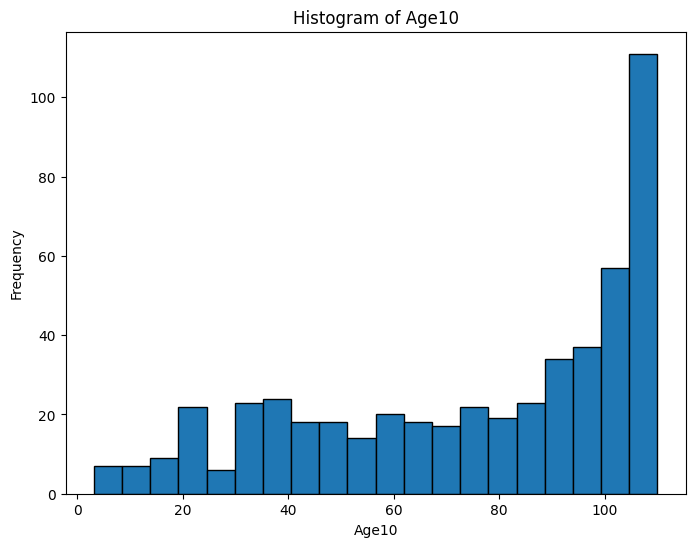

In [17]:
import matplotlib.pyplot as plt

# Assuming 'df' is the PySpark DataFrame you have loaded

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = df.select('Age10').toPandas()

# Plot the histogram using Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(pandas_df['Age10'], bins=20, edgecolor='black')
plt.xlabel('Age10')
plt.ylabel('Frequency')
plt.title('Histogram of Age10')
plt.show()

**9. Provide Summary Statistics of all columns (count, mean, stddev,min, max)**

In [18]:
df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

**10. Convert  Spark Dataframe to Pandas Dataframe**

In [21]:
pandas_df = df.toPandas()
pandas_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
0,0.01,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,4.98,24.0,71.72
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,9.14,21.6,86.79
2,0.03,0.0,7.07,0,0.47,7.19,61.1,4.97,2,242,17.8,4.03,34.7,67.21
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,2.94,33.4,50.38
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,5.33,36.2,59.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,9.67,22.4,76.01
502,0.05,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,9.08,20.6,84.37
503,0.06,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,5.64,23.9,100.10
504,0.11,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,6.48,22.0,98.23


**11. Show the last 5 rows of Pandas DataFrame**

In [20]:
print(pandas_df.tail(5))

     crim   zn  indus  chas   nox    rm   age   dis  rad  tax  ptratio  lstat  \
501  0.06  0.0  11.93     0  0.57  6.59  69.1  2.48    1  273     21.0   9.67   
502  0.05  0.0  11.93     0  0.57  6.12  76.7  2.29    1  273     21.0   9.08   
503  0.06  0.0  11.93     0  0.57  6.98  91.0  2.17    1  273     21.0   5.64   
504  0.11  0.0  11.93     0  0.57  6.79  89.3  2.39    1  273     21.0   6.48   
505  0.05  0.0  11.93     0  0.57  6.03  80.8  2.51    1  273     21.0   7.88   

     medv   Age10  
501  22.4   76.01  
502  20.6   84.37  
503  23.9  100.10  
504  22.0   98.23  
505  11.9   88.88  


In [22]:
spark.stop()